# Compare the SSP and CEDS-updated emissions

Theme Song: When I Argue I See Shapes<br>
Artist: Idlewild<br>
Album: Hope Is Important<br>
Released: 1998

This notebook was prepared following the FGD review following questions from some governments

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from ar6.utils import check_and_download, mkdir_p
import matplotlib.pyplot as pl

In [2]:
forcing = {}

check_and_download(
    '../data_input_large/rcmip-emissions-annual-means-v5-1-0.csv',
    'https://rcmip-protocols-au.s3-ap-southeast-2.amazonaws.com/v5.1.0/rcmip-emissions-annual-means-v5-1-0.csv'
)
    
emissions = pd.read_csv('../data_input_large/rcmip-emissions-annual-means-v5-1-0.csv')

In [3]:
scenarios = ['ssp119','ssp126','ssp245','ssp370','ssp370-lowNTCF-aerchemmip','ssp434','ssp460','ssp534-over','ssp585']

In [4]:
emissions = pd.read_csv('../data_input_large/rcmip-emissions-annual-means-v5-1-0.csv')
df_emissions = pd.concat([emissions.loc[(
        (emissions.Variable=='Emissions|BC')|
        (emissions.Variable=='Emissions|OC')|
        (emissions.Variable=='Emissions|Sulfur')|
        (emissions.Variable=='Emissions|NOx')|
        (emissions.Variable=='Emissions|NH3')|
        (emissions.Variable=='Emissions|VOC')|
        (emissions.Variable=='Emissions|CO')
    ) & (emissions.Scenario=='ssp245') & (emissions.Region=='World'), 'Variable'], emissions.loc[(
        (emissions.Variable=='Emissions|BC')|
        (emissions.Variable=='Emissions|OC')|
        (emissions.Variable=='Emissions|Sulfur')|
        (emissions.Variable=='Emissions|NOx')|
        (emissions.Variable=='Emissions|NH3')|
        (emissions.Variable=='Emissions|VOC')|
        (emissions.Variable=='Emissions|CO')
    ) & (emissions.Scenario=='ssp245') & (emissions.Region=='World'), '1750':'2100']], axis=1)#.interpolate(axis=1).T
df_emissions.set_index('Variable', inplace=True)
df_emissions = df_emissions.interpolate(axis=1).T
df_emissions.rename(
    columns={
        'Emissions|BC': 'BC',
        'Emissions|OC': 'OC',
        'Emissions|Sulfur': 'SO2',
        'Emissions|NOx': 'NOx',
        'Emissions|NH3': 'NH3',
        'Emissions|VOC': 'VOC',
        'Emissions|CO': 'CO'
    }, inplace=True
)
# only keep cols we want
emissions = df_emissions[['SO2', 'BC', 'OC', 'NH3', 'NOx', 'VOC', 'CO']]
emissions.index = emissions.index.astype('int')
emissions.index.name='year'
emissions.columns.name=None

emissions_ceds_update = emissions.copy()

emissions_old = pd.read_csv('../data_input_large/rcmip-emissions-annual-means-v5-1-0.csv')
df_emissions = pd.concat([emissions_old.loc[(
        (emissions_old.Variable=='Emissions|BC|MAGICC Fossil and Industrial')|
        (emissions_old.Variable=='Emissions|OC|MAGICC Fossil and Industrial')|
        (emissions_old.Variable=='Emissions|Sulfur|MAGICC Fossil and Industrial')|
        (emissions_old.Variable=='Emissions|NOx|MAGICC Fossil and Industrial')|
        (emissions_old.Variable=='Emissions|NH3|MAGICC Fossil and Industrial')|
        (emissions_old.Variable=='Emissions|VOC|MAGICC Fossil and Industrial')|
        (emissions_old.Variable=='Emissions|CO|MAGICC Fossil and Industrial')|
        (emissions_old.Variable=='Emissions|BC|MAGICC AFOLU|Agriculture')|
        (emissions_old.Variable=='Emissions|OC|MAGICC AFOLU|Agriculture')|
        (emissions_old.Variable=='Emissions|Sulfur|MAGICC AFOLU|Agriculture')|
        (emissions_old.Variable=='Emissions|NOx|MAGICC AFOLU|Agriculture')|
        (emissions_old.Variable=='Emissions|NH3|MAGICC AFOLU|Agriculture')|
        (emissions_old.Variable=='Emissions|VOC|MAGICC AFOLU|Agriculture')|
        (emissions_old.Variable=='Emissions|CO|MAGICC AFOLU|Agriculture')
    ) & (emissions_old.Scenario=='ssp245') & (emissions_old.Region=='World'), 'Variable'], emissions_old.loc[(
        (emissions_old.Variable=='Emissions|BC|MAGICC Fossil and Industrial')|
        (emissions_old.Variable=='Emissions|OC|MAGICC Fossil and Industrial')|
        (emissions_old.Variable=='Emissions|Sulfur|MAGICC Fossil and Industrial')|
        (emissions_old.Variable=='Emissions|NOx|MAGICC Fossil and Industrial')|
        (emissions_old.Variable=='Emissions|NH3|MAGICC Fossil and Industrial')|
        (emissions_old.Variable=='Emissions|VOC|MAGICC Fossil and Industrial')|
        (emissions_old.Variable=='Emissions|CO|MAGICC Fossil and Industrial')|
        (emissions_old.Variable=='Emissions|BC|MAGICC AFOLU|Agriculture')|
        (emissions_old.Variable=='Emissions|OC|MAGICC AFOLU|Agriculture')|
        (emissions_old.Variable=='Emissions|Sulfur|MAGICC AFOLU|Agriculture')|
        (emissions_old.Variable=='Emissions|NOx|MAGICC AFOLU|Agriculture')|
        (emissions_old.Variable=='Emissions|NH3|MAGICC AFOLU|Agriculture')|
        (emissions_old.Variable=='Emissions|VOC|MAGICC AFOLU|Agriculture')|
        (emissions_old.Variable=='Emissions|CO|MAGICC AFOLU|Agriculture')
    ) & (emissions_old.Scenario=='ssp245') & (emissions_old.Region=='World'), '1750':'2100']], axis=1)#.interpolate(axis=1).T
df_emissions.set_index('Variable', inplace=True)
df_emissions = df_emissions.interpolate(axis=1).T
for species in ['BC', 'OC', 'Sulfur', 'NOx', 'NH3', 'VOC', 'CO']:
    df_emissions[species] = df_emissions['Emissions|{}|MAGICC Fossil and Industrial'.format(species)] + df_emissions['Emissions|{}|MAGICC AFOLU|Agriculture'.format(species)]
df_emissions.rename(columns = {'Sulfur': 'SO2'}, inplace=True)
df_emissions.drop(columns=[
        'Emissions|BC|MAGICC Fossil and Industrial',
        'Emissions|OC|MAGICC Fossil and Industrial',
        'Emissions|Sulfur|MAGICC Fossil and Industrial',
        'Emissions|NOx|MAGICC Fossil and Industrial',
        'Emissions|NH3|MAGICC Fossil and Industrial',
        'Emissions|VOC|MAGICC Fossil and Industrial',
        'Emissions|CO|MAGICC Fossil and Industrial',
        'Emissions|BC|MAGICC AFOLU|Agriculture',
        'Emissions|OC|MAGICC AFOLU|Agriculture',
        'Emissions|Sulfur|MAGICC AFOLU|Agriculture',
        'Emissions|NOx|MAGICC AFOLU|Agriculture',
        'Emissions|NH3|MAGICC AFOLU|Agriculture',
        'Emissions|VOC|MAGICC AFOLU|Agriculture',
        'Emissions|CO|MAGICC AFOLU|Agriculture',
    ],
    inplace=True
)
df_emissions.index = emissions.index.astype('int')
df_emissions.index.name='year'
df_emissions.columns.name=None

global_total = {}
for species in ['BC', 'OC', 'SO2', 'NH3', 'NOx', 'NMVOC', 'CO']:
    df = pd.read_csv('../data_input_large/CEDS_v_2020_09_11_emissions/{}_global_CEDS_emissions_by_sector_2020_09_11.csv'.format(species))
    global_total[species] = df.sum(axis=0).values[3:].astype(float) / 1000 # yes could get openscm on this
    #unit = df.units[0]
    #print(unit)
global_total['VOC'] = global_total.pop('NMVOC')
new_ceds = pd.DataFrame(global_total)
new_ceds.index = np.arange(1750,2020)
new_ceds.index = new_ceds.index.astype('int')
new_ceds.index.name='year'
new_ceds.columns.name=None
emissions_ceds_update = new_ceds.loc[1750:2020] + emissions - df_emissions
emissions_ceds_update.drop(index=range(2020,2101), inplace=True)
emissions_ceds_update

,BC,CO,NH3,NOx,OC,SO2,VOC
year,,,,,,,
1750,2.097336,348.420476,6.683996,12.730074,15.447054,2.312083,60.599376
1751,2.072491,343.819148,6.615537,12.587160,15.188102,2.281498,59.667759
1752,2.063877,341.701465,6.573965,12.589121,15.033861,2.270899,59.213713
1753,2.071515,343.567551,6.635011,12.534665,15.181930,2.284976,59.610148
1754,2.098914,349.707369,6.767852,12.631676,15.558158,2.336934,60.855827
...,...,...,...,...,...,...,...
2015,7.992567,894.144647,62.462922,138.718989,30.046634,91.076152,213.006570
2016,7.918346,874.700320,63.054904,137.128483,30.086767,87.215738,211.778440
2017,7.886938,867.879243,63.739495,137.159668,30.057079,84.269791,211.717165


In [5]:
emissions_df = pd.read_csv('../data_input_large/rcmip-emissions-annual-means-v5-1-0.csv')
emissions_ssp = {}
for scenario in tqdm(scenarios):
    bc = emissions_df.loc[
        (emissions_df['Scenario']==scenario)&
        (emissions_df['Region']=='World')&
        (emissions_df['Variable']=='Emissions|BC')
        ,'1750':'2500'].interpolate(axis=1, pad=True).values.squeeze()
    oc = emissions_df.loc[
        (emissions_df['Scenario']==scenario)&
        (emissions_df['Region']=='World')&
        (emissions_df['Variable']=='Emissions|OC'),'1750':'2500'].interpolate(axis=1, pad=True).values.squeeze()
    so2 = emissions_df.loc[
        (emissions_df['Scenario']==scenario)&
        (emissions_df['Region']=='World')&
        (emissions_df['Variable']=='Emissions|Sulfur'),'1750':'2500'].interpolate(axis=1, pad=True).values.squeeze()
    nh3 = emissions_df.loc[
        (emissions_df['Scenario']==scenario)&
        (emissions_df['Region']=='World')&
        (emissions_df['Variable']=='Emissions|NH3'),'1750':'2500'].interpolate(axis=1, pad=True).values.squeeze()
    nox = emissions_df.loc[
        (emissions_df['Scenario']==scenario)&
        (emissions_df['Region']=='World')&
        (emissions_df['Variable']=='Emissions|NOx'),'1750':'2500'].interpolate(axis=1, pad=True).values.squeeze()
    nmvoc = emissions_df.loc[
        (emissions_df['Scenario']==scenario)&
        (emissions_df['Region']=='World')&
        (emissions_df['Variable']=='Emissions|VOC'),'1750':'2500'].interpolate(axis=1, pad=True).values.squeeze()
    co = emissions_df.loc[
        (emissions_df['Scenario']==scenario)&
        (emissions_df['Region']=='World')&
        (emissions_df['Variable']=='Emissions|CO'),'1750':'2500'].interpolate(axis=1, pad=True).values.squeeze()
    
    emissions_ssp[scenario] = pd.DataFrame(
    {
        'BC': bc,
        'OC': oc,
        'SO2': so2,
        'NH3': nh3,
        'NOx': nox,
        'VOC': nmvoc,
        'CO': co
    })

  0%|          | 0/9 [00:00<?, ?it/s]

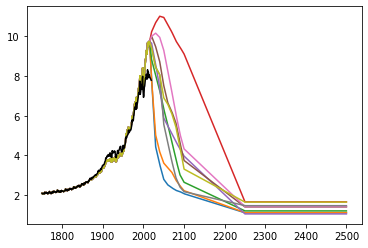

In [6]:
for scenario in scenarios:
    pl.plot(np.arange(1750,2501), emissions_ssp[scenario]['BC'])
pl.plot(np.arange(1750,2020), emissions_ceds_update['BC'], color='k')

In [7]:
colors = {
    'ssp119': '#1e9583',
    'ssp126': '#1d3354',
    'ssp245': '#e9dc3d',
    'ssp370': '#f11111',
    'ssp370-lowNTCF-aerchemmip': '#f11111',
    'ssp434': '#63bce4',
    'ssp460': '#e78731',
    'ssp534-over': '#996dc8',
    'ssp585': '#830b22',
}

ls = {
    'ssp119': '-',
    'ssp126': '-',
    'ssp245': '-', 
    'ssp370': '-',
    'ssp370-lowNTCF-aerchemmip': '-.',
    'ssp434': '-',
    'ssp460': '-',
    'ssp534-over': '-',
    'ssp585': '-',
}

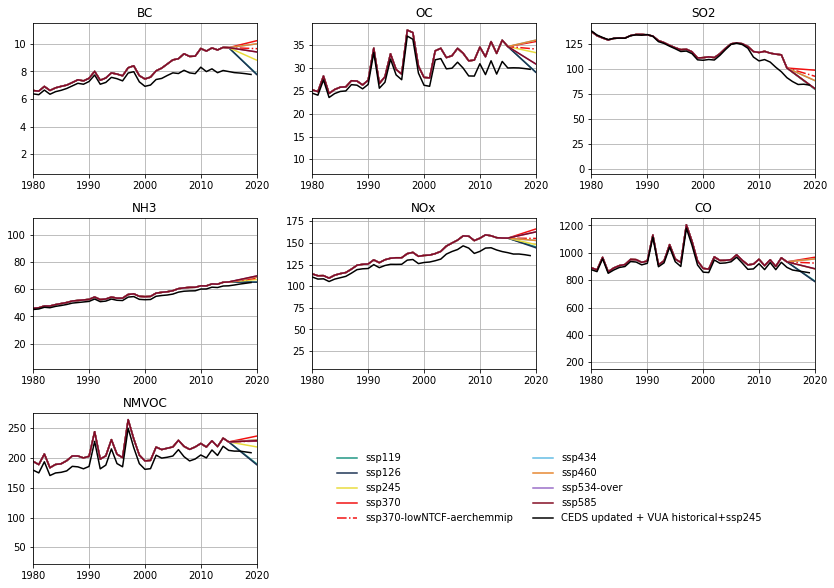

In [8]:
fig, ax = pl.subplots(3,3, figsize=(29.7/2.54,21/2.54),squeeze=True)
for scenario in scenarios:
    ax[0,0].plot(np.arange(1750,2501),emissions_ssp[scenario]['BC'], color=colors[scenario], ls=ls[scenario], label=scenario)
    ax[0,1].plot(np.arange(1750,2501),emissions_ssp[scenario]['OC'], color=colors[scenario], ls=ls[scenario], label=scenario)
    ax[0,2].plot(np.arange(1750,2501),emissions_ssp[scenario]['SO2'], color=colors[scenario], ls=ls[scenario], label=scenario)
    ax[1,0].plot(np.arange(1750,2501),emissions_ssp[scenario]['NH3'], color=colors[scenario], ls=ls[scenario], label=scenario)
    ax[1,1].plot(np.arange(1750,2501),emissions_ssp[scenario]['NOx'], color=colors[scenario], ls=ls[scenario], label=scenario)
    ax[1,2].plot(np.arange(1750,2501),emissions_ssp[scenario]['CO'], color=colors[scenario], ls=ls[scenario], label=scenario)
    ax[2,0].plot(np.arange(1750,2501),emissions_ssp[scenario]['VOC'], color=colors[scenario], ls=ls[scenario], label=scenario)

ax[0,0].plot(np.arange(1750,2020),emissions_ceds_update['BC'], color='k', ls=ls[scenario], label='CEDS updated + VUA historical+ssp245')
ax[0,1].plot(np.arange(1750,2020),emissions_ceds_update['OC'], color='k', ls=ls[scenario], label='CEDS updated + VUA historical+ssp245')
ax[0,2].plot(np.arange(1750,2020),emissions_ceds_update['SO2'], color='k', ls=ls[scenario], label='CEDS updated + VUA historical+ssp245')
ax[1,0].plot(np.arange(1750,2020),emissions_ceds_update['NH3'], color='k', ls=ls[scenario], label='CEDS updated + VUA historical+ssp245')
ax[1,1].plot(np.arange(1750,2020),emissions_ceds_update['NOx'], color='k', ls=ls[scenario], label='CEDS updated + VUA historical+ssp245')
ax[1,2].plot(np.arange(1750,2020),emissions_ceds_update['CO'], color='k', ls=ls[scenario], label='CEDS updated + VUA historical+ssp245')
ax[2,0].plot(np.arange(1750,2020),emissions_ceds_update['VOC'], color='k', ls=ls[scenario], label='CEDS updated + VUA historical+ssp245')

ax[0,0].set_xlim(1980,2020)
ax[0,1].set_xlim(1980,2020)
ax[0,2].set_xlim(1980,2020)
ax[1,0].set_xlim(1980,2020)
ax[1,1].set_xlim(1980,2020)
ax[1,2].set_xlim(1980,2020)
ax[2,0].set_xlim(1980,2020)

ax[0,0].grid()
ax[0,1].grid()
ax[0,2].grid()
ax[1,0].grid()
ax[1,1].grid()
ax[1,2].grid()
ax[2,0].grid()
ax[2,1].axis('off')
ax[2,2].axis('off')


ax[0,0].set_title('BC')
ax[0,1].set_title('OC')
ax[0,2].set_title('SO2')
ax[1,0].set_title('NH3')
ax[1,1].set_title('NOx')
ax[1,2].set_title('CO')
ax[2,0].set_title('NMVOC')

pl.tight_layout()
ax[2,0].legend(bbox_to_anchor=[3.3,0.5], frameon=False, ncol=2, loc='center right')